In [11]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import matplotlib.dates as mdates

In [12]:
# load the data 
data = pd.read_csv("./BTC.csv" , parse_dates=["Date"] , index_col="Date" )
data = data.drop(columns="Crypto")
print("First 5 rows of data : \n",data.head())
print("Last 5 rows of data : \n",data.tail())

data.index = pd.to_datetime(data.index ,   format="%yyyy-%mm-%dd")
data = data.sort_index()

First 5 rows of data : 
               Open    High     Low   Close
Date                                      
2019-12-31  7254.0  7309.0  7132.0  7171.0
2019-12-30  7402.0  7430.0  7217.0  7254.0
2019-12-29  7334.0  7529.0  7295.0  7402.0
2019-12-28  7235.0  7359.0  7235.0  7334.0
2019-12-27  7208.0  7267.0  7087.0  7235.0
Last 5 rows of data : 
                Open     High      Low    Close
Date                                          
2022-01-07  43114.0  43233.0  40769.0  41908.0
2022-01-06  43658.0  43764.0  42529.0  43114.0
2022-01-05  46298.0  46851.0  43522.0  43658.0
2022-01-04  46055.0  47490.0  45586.0  46298.0
2022-01-03  47026.0  47544.0  45745.0  46055.0


C:\Users\arnol\AppData\Local\Temp\ipykernel_7716\610257892.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("./BTC.csv" , parse_dates=["Date"] , index_col="Date" )


In [13]:
print(data.info())  # Column info & data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1974 entries, 2018-01-01 to 2023-05-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1974 non-null   float64
 1   High    1974 non-null   float64
 2   Low     1974 non-null   float64
 3   Close   1974 non-null   float64
dtypes: float64(4)
memory usage: 77.1 KB
None


In [14]:
print("Volume of data : " , data.shape)

Volume of data :  (1974, 4)


In [15]:
# handle duplicated values

data.drop_duplicates(inplace=True)
print("Duplicated values in data : ", data.duplicated().sum())

Duplicated values in data :  0


In [16]:
# handle missing values
print("missing values in data : ", data.isnull().sum())

missing values in data :  Open     0
High     0
Low      0
Close    0
dtype: int64


In [17]:
# Separate categorical and numerical columns

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical = ", categorical_cols)
print("Numerical = ",numerical_cols)

Categorical =  []
Numerical =  ['Open', 'High', 'Low', 'Close']


In [18]:
#########################       EDA ANALYTICS #########################

In [19]:
# Summary statistics of numerical columns
print("summary statistics  \n",data.describe().T)


summary statistics  
         count          mean           std     min     25%      50%      75%  \
Open   1973.0  20646.609731  16392.623868  3188.0  8019.0  11762.0  30960.0   
High   1973.0  21181.196148  16829.497753  3266.0  8219.0  12057.0  31920.0   
Low    1973.0  20071.843893  15901.396638  3156.0  7751.0  11518.0  29739.0   
Close  1973.0  20651.124683  16391.434681  3188.0  8019.0  11757.0  30991.0   

           max  
Open   67802.0  
High   68925.0  
Low    66112.0  
Close  67802.0  


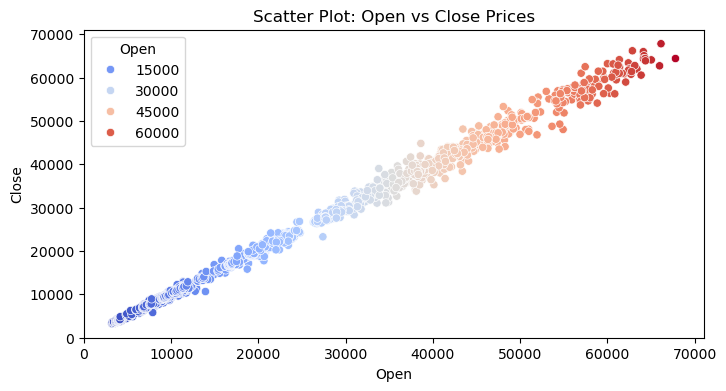

In [20]:
# Scatter plot between Open & Close prices
plt.figure(figsize=(8, 4))
sb.scatterplot(x=data['Open'], y=data['Close'], hue=data['Open'], palette='coolwarm')
plt.title("Scatter Plot: Open vs Close Prices")
plt.show()

In [21]:
numeric_cols = data.select_dtypes(include=["number" , "float64"])


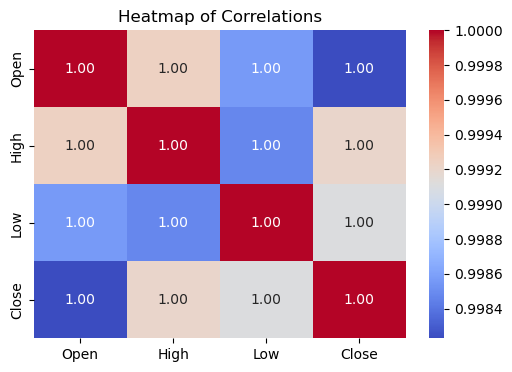

In [22]:
# Heatmap for correlation analysis
plt.figure(figsize=(6, 4))
sb.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlations")
plt.show()

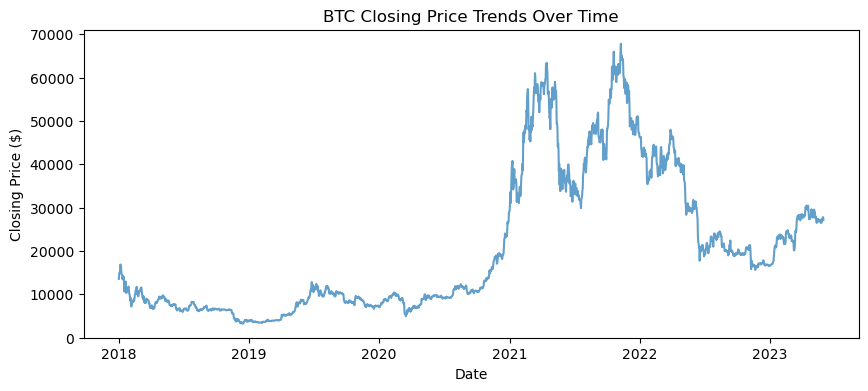

In [23]:
# creating time series - line chart 

# Plot the price over time
plt.figure(figsize=(10, 4))
sb.lineplot(data=data, x=data.index, y="Close", alpha=0.7)
plt.title("BTC Closing Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.show()


Skewness of Numerical Columns:
Open     0.996940
High     0.991543
Low      0.998535
Close    0.995919
dtype: float64


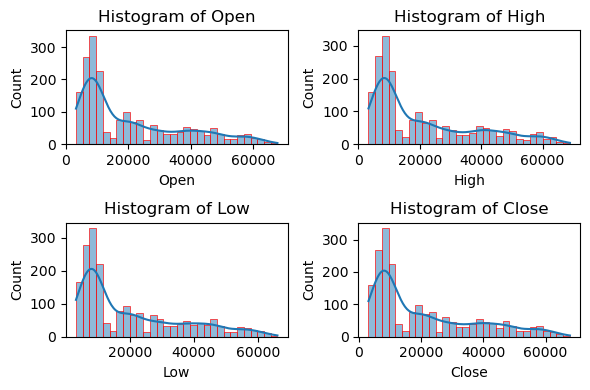

In [24]:
# Skewness Analysis 
print("\nSkewness of Numerical Columns:")
print(numeric_cols.skew())


# Create histograms for all numerical columns
df_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns

# Create histograms with KDE lines
plt.figure(figsize=(6, 4))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(2, 2, i)  # Adjust grid size based on number of columns
    sb.histplot(df_numeric[col], bins=30, kde=True, edgecolor="red")
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [25]:
#########feature engineering and indicators#########

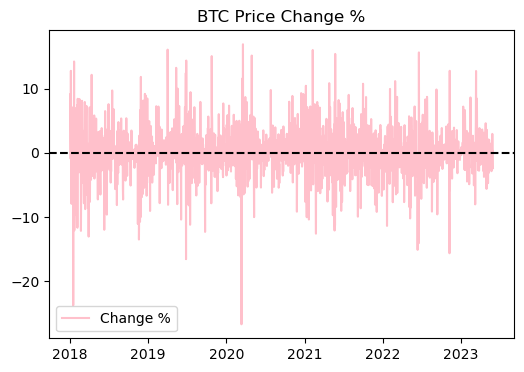

In [26]:
# price changes in %

data["change%"] =  data["Close"].pct_change() *100


# graph depicting the % change
plt.figure(figsize=(6,4))
plt.plot(data["change%"] , label="Change %" , color="pink")
plt.title("BTC Price Change %")
plt.axhline(y=0 , color="black" , linestyle="--")
plt.legend()
plt.show()

Date       2023-05-27    2023-05-28    2023-05-29    2023-05-30    2023-05-31
Open     26752.000000  26759.000000  27552.000000  27680.000000  27777.000000
High     26832.000000  27661.000000  28419.000000  28019.000000  27837.000000
Low      26629.000000  26747.000000  27537.000000  27573.000000  26884.000000
Close    26759.000000  27552.000000  27680.000000  27777.000000  27120.000000
change%      0.026166      2.963489      0.464576      0.350434     -2.365266
MA7      26771.571429  26871.142857  26983.285714  27063.428571  27160.142857
MA30     27648.133333  27588.200000  27534.333333  27481.966667  27462.466667


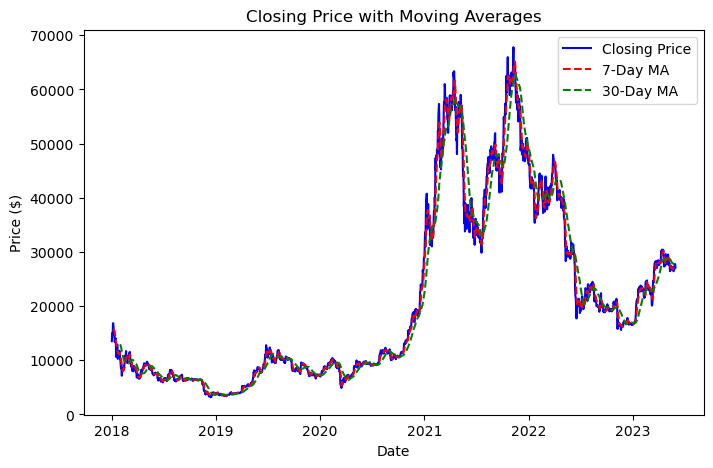

In [27]:
# calculate the moving average  > avg moving price over the time period
data["MA7"] = data["Close"].rolling(window=7).mean()
data["MA30"] = data["Close"].rolling(window=30).mean()

print(data.tail().T)

# Plot Closing Price with Moving Averages
plt.figure(figsize=(8, 5))
plt.plot( data["Close"], label="Closing Price", color='blue')
plt.plot(data["MA7"], label="7-Day MA", color='red', linestyle="dashed")
plt.plot( data["MA30"], label="30-Day MA", color='green', linestyle="dashed")
plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


In [28]:
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data["RSI_14"] = compute_RSI(data)


# Volatility: Standard Deviation of Close Price over 7-day window
data['Volatility_7'] = data['Close'].rolling(window=7).std()

# Average True Range (ATR) - Measures market volatility
data['ATR_14'] = (data['High'] - data['Low']).rolling(window=14).mean()

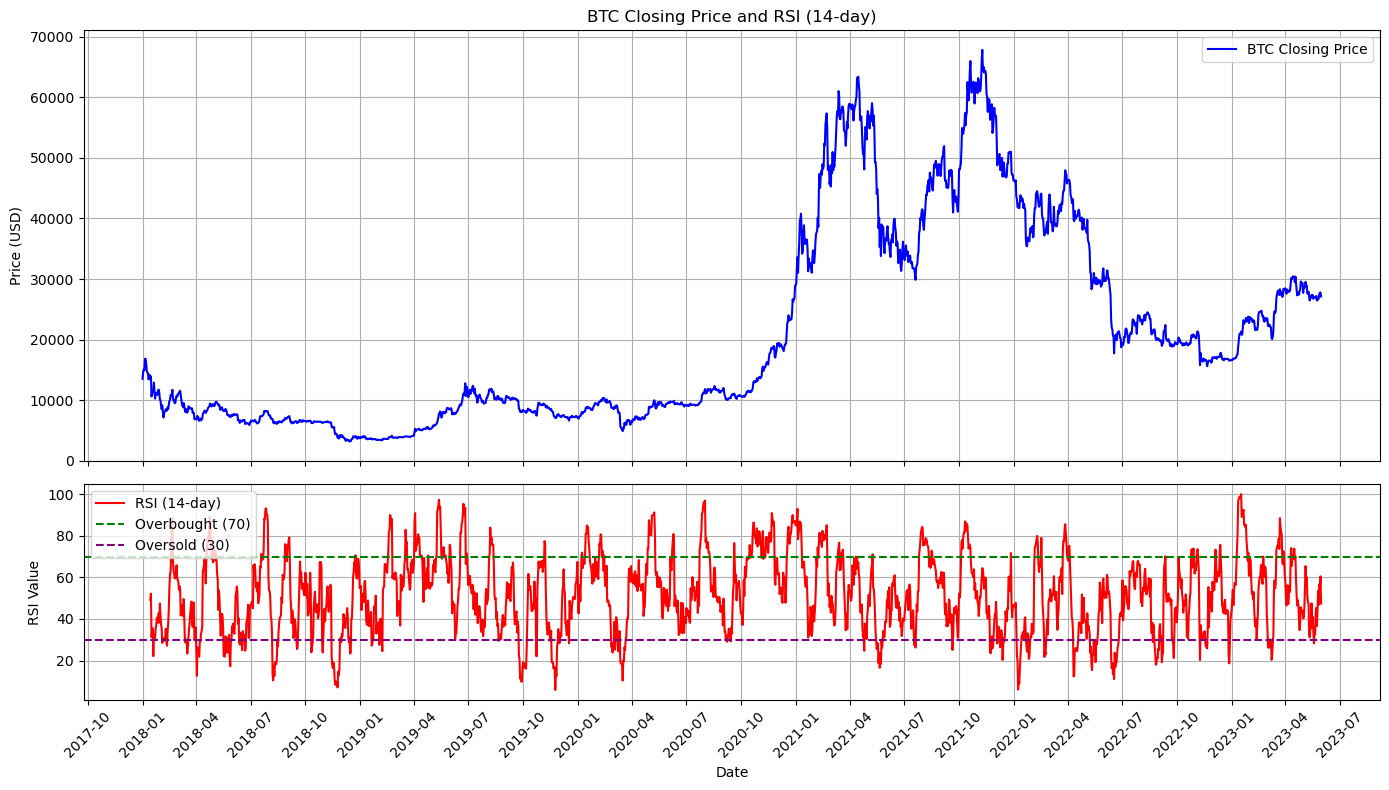

In [29]:
# Plot closing price and RSI in two subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot closing price in the first subplot
ax[0].plot(data.index, data['Close'], color='blue', label='BTC Closing Price')
ax[0].set_title('BTC Closing Price and RSI (14-day)')
ax[0].set_ylabel('Price (USD)')
ax[0].legend()
ax[0].grid()

# Plot RSI in the second subplot
ax[1].plot(data.index, data['RSI_14'], color='red', label='RSI (14-day)')
ax[1].axhline(70, color='green', linestyle='--', label='Overbought (70)')
ax[1].axhline(30, color='purple', linestyle='--', label='Oversold (30)')
ax[1].set_ylabel('RSI Value')
ax[1].set_xlabel('Date')
ax[1].legend()
ax[1].grid()

# Format x-axis dates for better readability
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


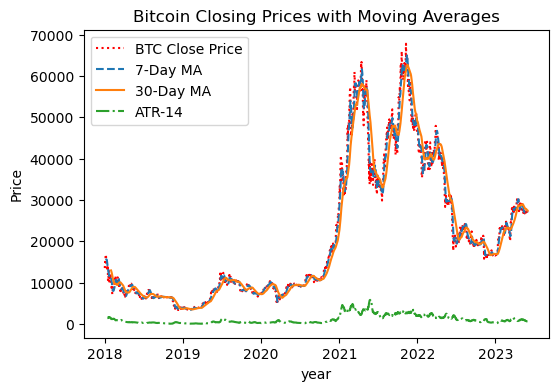

In [30]:
# visualize indicators

plt.figure(figsize=(6, 4))
plt.plot( data['Close'], label="BTC Close Price", color='red' , linestyle=":")
plt.plot(data['MA7'], label='7-Day MA', linestyle="--")
plt.plot(data['MA30'], label='30-Day MA', linestyle='-')
plt.plot(data["ATR_14"] , label="ATR-14" , linestyle="-.")
plt.title("Bitcoin Closing Prices with Moving Averages")
plt.xlabel("year")
plt.ylabel("Price")
plt.legend()
plt.show()

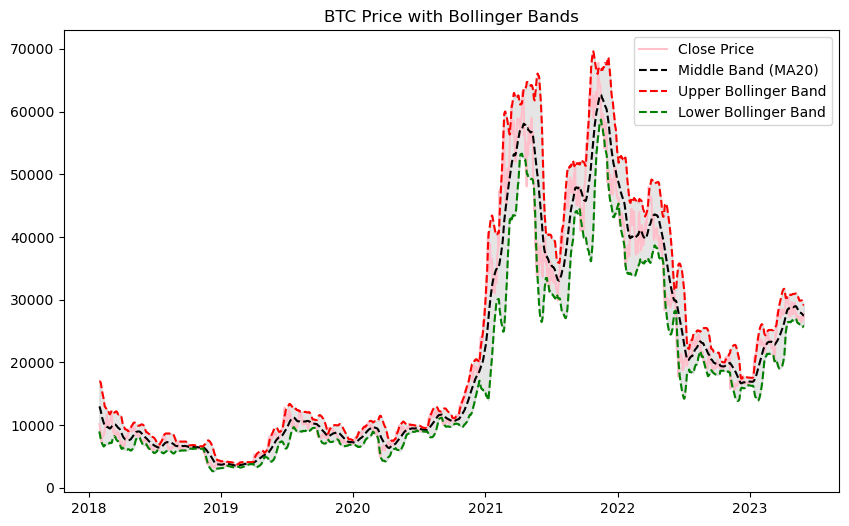

In [31]:
# Bollinger Bands 

#middle band
data["MidBand"] = data["MA30"]

# calculate the std deviation for rolling window
data["Std_Deviation"] = data["Close"].rolling(window=30).std()


#lower and upper band
data["LowerBand"] = data["MidBand"] -( 2 * data["Std_Deviation"])
data["UpperBand"] = data["MidBand"] + ( 2 * data["Std_Deviation"])

# Drop NaN values (caused by rolling calculations)
data.dropna(inplace=True)



plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label="Close Price", color='pink')
plt.plot(data.index, data['MidBand'], label="Middle Band (MA20)", color='black', linestyle='dashed')
plt.plot(data.index, data['UpperBand'], label="Upper Bollinger Band", color='red', linestyle='dashed')
plt.plot(data.index, data['LowerBand'], label="Lower Bollinger Band", color='green', linestyle='dashed')

plt.fill_between(data.index, data['LowerBand'], data['UpperBand'], color='gray', alpha=0.2)  # Shaded Bollinger area
plt.title("BTC Price with Bollinger Bands")
plt.legend()
plt.show()


In [32]:
print("Overview of dataset after adding some features \n\n" , data.head())

Overview of dataset after adding some features 

                Open     High     Low    Close   change%           MA7  \
Date                                                                    
2018-01-30  11224.0  11224.0  9810.0  10138.0 -9.667647  11146.428571   
2018-01-31  10125.0  10334.0  9628.0   9999.0 -1.371079  10973.714286   
2018-02-01   9999.0  10203.0  8564.0   9146.0 -8.530853  10673.714286   
2018-02-02   9146.0   9164.0  7695.0   8524.0 -6.800787  10334.428571   
2018-02-03   8588.0   9471.0  8176.0   9157.0  7.426091   9992.000000   

                    MA30     RSI_14  Volatility_7       ATR_14       MidBand  \
Date                                                                           
2018-01-30  12968.366667  47.403231    522.275425  1314.214286  12968.366667   
2018-01-31  12850.500000  41.983490    675.847546  1182.428571  12850.500000   
2018-02-01  12663.033333  37.111183    946.662508  1200.857143  12663.033333   
2018-02-02  12445.266667  35.664046   

In [ ]:
##################### build the model to predict the trends #####################


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#feature selection
# Define the features and target variable
features = ['Close', 'Open' , 'High' , 'Low' ]
target = 'Trend'
x = data[features]
y = data[target]
print("Data of X features \n " , x.head().T)
print("Data of y features \n " , y.head())

Data of X features 
  Date   2018-01-30  2018-01-31  2018-02-01  2018-02-02  2018-02-03
Close     10138.0      9999.0      9146.0      8524.0      9157.0
Open      11224.0     10125.0      9999.0      9146.0      8588.0
High      11224.0     10334.0     10203.0      9164.0      9471.0
Low        9810.0      9628.0      8564.0      7695.0      8176.0
Data of y features 
  Date
2018-01-30    0
2018-01-31    0
2018-02-01    0
2018-02-02    1
2018-02-03    0
Name: Trend, dtype: int32


In [ ]:
# split features into train and test
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled  = scaler.transform(xtest)

In [ ]:
# Model 1: XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=45)
xgb_model.fit(X_train_scaled, ytrain)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(ytest, y_pred_xgb)
print("\nXGBoost Classifier Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("\nclassification Report (XGBoost):\n", classification_report(ytest, y_pred_xgb))


XGBoost Classifier Accuracy: 52.06%

classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.53      0.46      0.49       244
           1       0.52      0.58      0.55       242

    accuracy                           0.52       486
   macro avg       0.52      0.52      0.52       486
weighted avg       0.52      0.52      0.52       486



In [ ]:
# Model 2: Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=2000)
logreg_model.fit(X_train_scaled, ytrain)
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(ytest, y_pred_logreg)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))
print("Classification Report (Logistic Regression):\n", classification_report(ytest, y_pred_logreg))


Logistic Regression Accuracy: 50.00%
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       244
           1       0.50      1.00      0.67       242

    accuracy                           0.50       486
   macro avg       0.75      0.50      0.34       486
weighted avg       0.75      0.50      0.34       486

